<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(2_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.628194,51.691754,77.609538,60.422229,-134.245020,107.106695,218.192443,-111.085748
1,0.0,1.0,48.460222,89.130458,78.599670,29.379559,-704.296655,-448.726746,209.503171,-658.229916
2,0.0,2.0,26.725351,57.571095,77.826167,28.423841,244.228109,444.774563,204.164535,240.610028
3,0.0,3.0,30.187498,43.783014,52.971201,29.414264,5.702993,172.058969,199.109077,-27.050108
4,0.0,4.0,49.607319,94.496433,94.673148,85.283186,-348.189687,-14.129602,214.716318,-228.845919
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.071888,27.198243,92.030563,99.109026,-56.593310,257.816410,277.936621,-20.120212
249996,999.0,246.0,77.701200,94.898770,69.728750,73.828681,868.161244,1194.318644,282.320538,911.998106
249997,999.0,247.0,29.999741,63.747733,63.924872,28.512897,-466.754595,-270.569353,270.765556,-541.334909
249998,999.0,248.0,88.444082,47.728178,69.711893,69.150527,401.060044,686.094725,272.411460,413.683264


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.628194,51.691754,77.609538,60.422229,-134.245020,107.106695,218.192443,-111.085748
1,0.0,1.0,48.460222,89.130458,78.599670,29.379559,-704.296655,-448.726746,209.503171,-658.229916
2,0.0,2.0,26.725351,57.571095,77.826167,28.423841,244.228109,444.774563,204.164535,240.610028
3,0.0,3.0,30.187498,43.783014,52.971201,29.414264,5.702993,172.058969,199.109077,-27.050108
4,0.0,4.0,49.607319,94.496433,94.673148,85.283186,-348.189687,-14.129602,214.716318,-228.845919
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.071888,27.198243,92.030563,99.109026,-56.593310,257.816410,277.936621,-20.120212
249996,999.0,246.0,77.701200,94.898770,69.728750,73.828681,868.161244,1194.318644,282.320538,911.998106
249997,999.0,247.0,29.999741,63.747733,63.924872,28.512897,-466.754595,-270.569353,270.765556,-541.334909
249998,999.0,248.0,88.444082,47.728178,69.711893,69.150527,401.060044,686.094725,272.411460,413.683264


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,41.628194,51.691754,77.609538,60.422229,-134.245020,107.106695,218.192443,-111.085748
1,0.0,1.0,48.460222,89.130458,78.599670,29.379559,-704.296655,-448.726746,209.503171,-658.229916
2,0.0,2.0,26.725351,57.571095,77.826167,28.423841,244.228109,444.774563,204.164535,240.610028
3,0.0,3.0,30.187498,43.783014,52.971201,29.414264,5.702993,172.058969,199.109077,-27.050108
4,0.0,4.0,49.607319,94.496433,94.673148,85.283186,-348.189687,-14.129602,214.716318,-228.845919
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,86.071888,27.198243,92.030563,99.109026,-56.593310,257.816410,277.936621,-20.120212
249996,999.0,246.0,77.701200,94.898770,69.728750,73.828681,868.161244,1194.318644,282.320538,911.998106
249997,999.0,247.0,29.999741,63.747733,63.924872,28.512897,-466.754595,-270.569353,270.765556,-541.334909
249998,999.0,248.0,88.444082,47.728178,69.711893,69.150527,401.060044,686.094725,272.411460,413.683264


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    41.628194  51.691754  77.609538  60.422229 -134.245020   
      1.0    48.460222  89.130458  78.599670  29.379559 -704.296655   
      2.0    26.725351  57.571095  77.826167  28.423841  244.228109   
      3.0    30.187498  43.783014  52.971201  29.414264    5.702993   
      4.0    49.607319  94.496433  94.673148  85.283186 -348.189687   
...                ...        ...        ...        ...         ...   
999.0 245.0  86.071888  27.198243  92.030563  99.109026  -56.593310   
      246.0  77.701200  94.898770  69.728750  73.828681  868.161244   
      247.0  29.999741  63.747733  63.924872  28.512897 -466.754595   
      248.0  88.444082  47.728178  69.711893  69.150527  401.060044   
      249.0  20.812131  52.896248  47.422137  64.450857 -217.040647   

                       Y       y_hat       e_hat  
rep   index                                       
0.0   0.0     107.106695  218.192443 -111.085748  
      1.0    -448.726746  209.503171 -658.229916  
      2.0     444.774563  204.164535  240.610028  
      3.0     172.058969  199.109077  -27.050108  
      4.0     -14.129602  214.716318 -228.845919  
...                  ...         ...         ...  
999.0 245.0   257.816410  277.936621  -20.120212  
      246.0  1194.318644  282.320538  911.998106  
      247.0  -270.569353  270.765556 -541.334909  
      248.0   686.094725  272.411460  413.683264  
      249.0   -21.459274  197.407803 -218.867077  

[250000 rows x 8 columns]

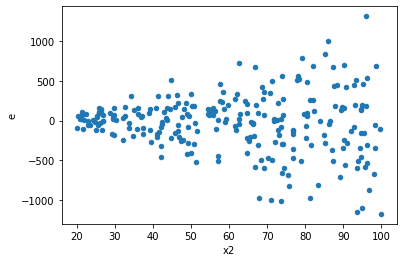

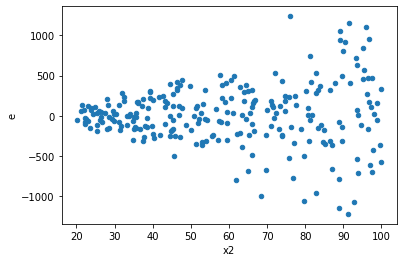

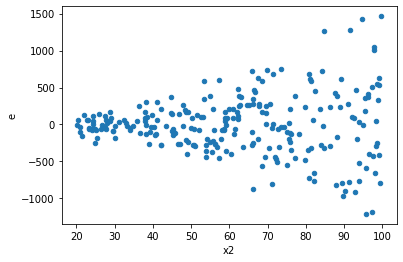

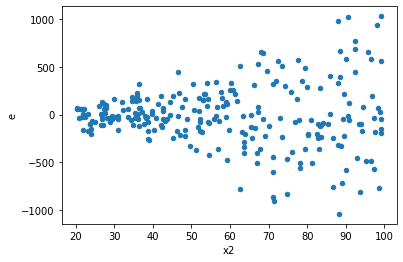

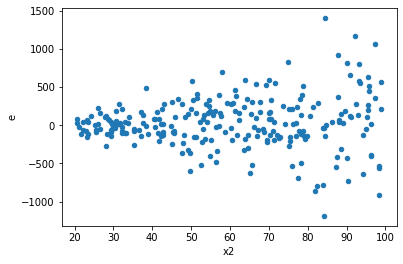

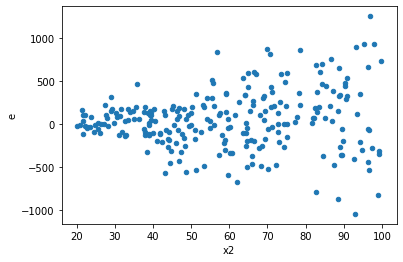

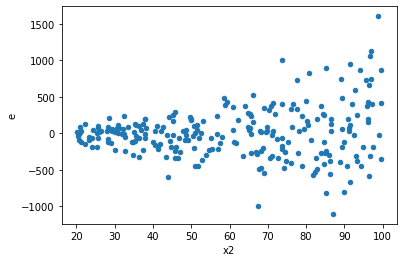

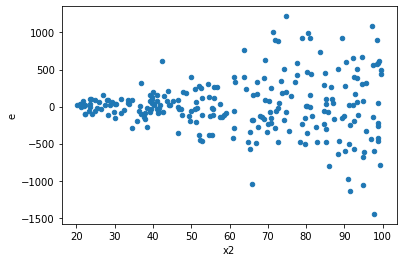

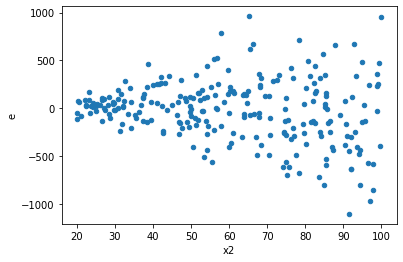

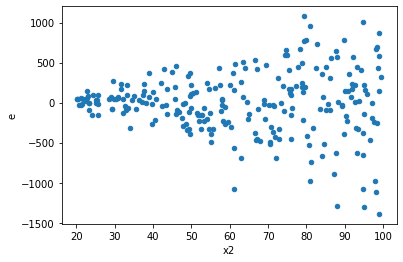

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,3106981.625700018,24593297.52989283,32364.391934375188,256180.18260305029,7.915495002115385,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,3271496.194455087,26734054.196972046,34078.085358907156,278479.7312184588,8.171812714403897,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,2868487.9178143214,31142420.442529514,29880.082477232514,324400.2129430158,10.856737533780116,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,1534176.0395732352,21100990.25119171,15981.0004122212,219801.98178324697,13.753956330240573,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,3567013.1019249856,20152659.341973446,37156.38647838527,209923.5348122234,5.6497295541465204,1.1102230246251565e-15,0.9999999999999994,5.551115123125783e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,2892632.8637159886,17445708.405013863,30131.592330374882,181726.1292188944,6.031082832476164,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2297603.1696751183,20808860.56698073,23933.366350782482,216758.96423938262,9.056768741280553,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,2414049.851119245,25941066.744718276,25146.352615825468,270219.44525748206,10.745870360834106,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,2171625.039535465,16401180.046819806,22621.09416182776,170845.6254877063,7.5524916816800935,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,3106981.625700018,24593297.52989283,32364.391934375188,256180.18260305029,7.915495002115385,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,3271496.194455087,26734054.196972046,34078.085358907156,278479.7312184588,8.171812714403897,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,2868487.9178143214,31142420.442529514,29880.082477232514,324400.2129430158,10.856737533780116,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,1534176.0395732352,21100990.25119171,15981.0004122212,219801.98178324697,13.753956330240573,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,3567013.1019249856,20152659.341973446,37156.38647838527,209923.5348122234,5.6497295541465204,1.1102230246251565e-15,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,2892632.8637159886,17445708.405013863,30131.592330374882,181726.1292188944,6.031082832476164,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,2297603.1696751183,20808860.56698073,23933.366350782482,216758.96423938262,9.056768741280553,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,2414049.851119245,25941066.744718276,25146.352615825468,270219.44525748206,10.745870360834106,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,2171625.039535465,16401180.046819806,22621.09416182776,170845.6254877063,7.5524916816800935,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64